## Nonlinear Classification

## Higher Order Feature Vector

Higher Order Feature Vectors are a technique used in machine learning to capture non-linear relationships between features and the target variable by introducing polynomial terms and interactions between features. This approach is particularly useful when the relationship between the input variables (features) and the output variable is not linear, and a linear model (like linear regression) cannot capture the complexity of the data.

Here's a breakdown of the concept:

### Basic Idea

- **Linear Models**: Traditional linear models predict the outcome based on a linear combination of input features. For example, in a simple linear regression, the predicted outcome $y$ is modeled as $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$, where $x_1, x_2, ..., x_n$ are the features, and $\theta_0, \theta_1, ..., \theta_n$ are the model parameters.
- **Limitation**: Linear models are limited in their ability to handle complex, non-linear relationships between the features and the target variable.

### Higher Order Features

- **Polynomial Features**: To capture non-linear relationships, we can extend our feature set with polynomial terms. For example, if we have a single feature $x$, we can create additional features like $x^2, x^3, ..., x^d$, where $d$ is the degree of the polynomial. This allows the model to fit more complex patterns in the data.
- **Interaction Features**: Besides polynomial terms, we can also include interaction terms between different features. For instance, if we have two features $x_1$ and $x_2$, we can include a feature representing their interaction $x_1 \times x_2$. This helps in capturing the effect of the interaction between variables on the target variable.

### Implementation

- **Feature Vector Expansion**: The process involves expanding the original feature vector to include these higher order and interaction terms. For example, for two features $x_1$ and $x_2$, and using up to second-degree polynomials, the expanded feature vector might look like $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$.
- **Model Training**: After expanding the feature set, a linear model can be trained on this enhanced feature set. Despite the model being linear in parameters, the inclusion of higher order features allows it to capture non-linear relationships in the data.

### Considerations

- **Overfitting**: Introducing higher order features increases the model's complexity, which can lead to overfitting. Regularization techniques like Ridge or Lasso regression are often used alongside to mitigate this risk.
- **Feature Space Explosion**: The number of higher order and interaction terms can grow quickly with the number of original features and the degree of the polynomial, leading to a high-dimensional feature space. It's important to select the degree of the polynomial and the interactions judiciously.

Higher Order Feature Vectors are a powerful way to extend linear models to address non-linear problems, making them more flexible and applicable to a wider range of datasets.

**Note**:
Below Python code is for inspiration purpose only, it have a lot more concepts that we havent covered yet...

Model accuracy: 0.90


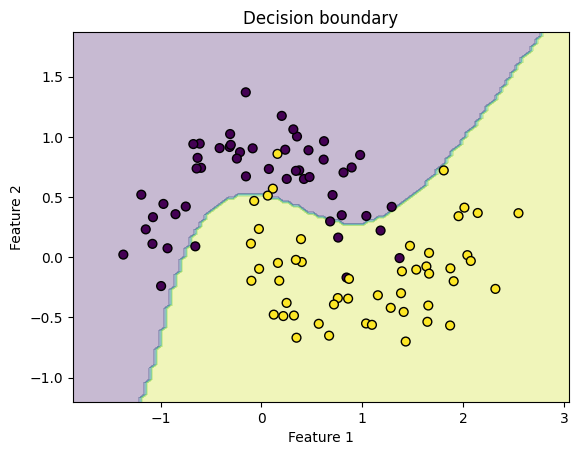

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Generate a dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use PolynomialFeatures to create higher order terms
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Predict and calculate accuracy
accuracy = model.score(X_test_poly, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.title("Decision boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plot_decision_boundary(model, X, y)
plt.show()

## Counting dimensions of feature vectors

The dimension of a feature vector refers to the number of features (or attributes) that the vector contains. 

Question: Let $x \in \mathbf{R}^{150},$ i.e. $x = \big [ x_1, x_2, ..., x_{150} \big ]^ T$  where $x_ i$ is the i-th component of x. Let $\phi (x)$ be an order  polynomial feature vector.